In [80]:
!pip install tsplib95
import tsplib95
import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:
def x_ray_1(a,b):
  x_ray_1 = tsplib95.distances.xray(a,b,sx=1.0, sy=1.0, sz=1.0)
  return x_ray_1
def x_ray_2(a,b):
  x_ray_2 = tsplib95.distances.xray(a,b,sx=1.25, sy=1.5, sz=1.15)
  return x_ray_2
def eudcl(a,b):
  eudcl = tsplib95.distances.euclidean(a,b)
  return eudcl
def att(a,b):
  att = tsplib95.distances.pseudo_euclidean(a,b)
  return att
def geo(a,b):
  geo = tsplib95.distances.geographical(a,b)
  return geo  

In [84]:
#Explicit Functions

def upperRow(dim,Matrix_of_distances_1, problem):
  #Symmetrical TSP Explicit Upper row

  for i in range(0,dim-1):
        for j in range(0,len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][i])):
          Matrix_of_distances_1[i][j+i+1]= problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][i][j]
          Matrix_of_distances_1[j+i+1][i]=Matrix_of_distances_1[i][j+i+1]
  return(Matrix_of_distances_1)

def lowerRow(dim, Matrix_of_distances_1, problem):
  #Symmetrical TSP Explicit Lower row

  for i in range(0,dim-1):
        for j in range(0,len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][i])):
          Matrix_of_distances_1[i+1][j]= problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][i][j]
          Matrix_of_distances_1[j][i+1]=Matrix_of_distances_1[i+1][j]

  return(Matrix_of_distances_1)

def asymfullMatrix(dim, Matrix_of_distances_1, problem):
  #Assymetrical TSP Explicit (full matrix every time )

  float_formatter = "{:.0f}".format
  np.set_printoptions(formatter={'float_kind':float_formatter})
  all_numbers=[]
  for z in range(len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'])):
    for arithmoi_seiras in range(len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][z])):
      all_numbers.append(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][z][arithmoi_seiras])
  metritis_arithmou=0
  for i in range(dim):
    for j in range(dim):
      Matrix_of_distances_1[i][j]=all_numbers[metritis_arithmou]
      metritis_arithmou+=1

  return(Matrix_of_distances_1)

def sopfullMatrix(dim, Matrix_of_distances_1, problem):
  #SOP Explicit (full matrix every time )

  float_formatter = "{:.0f}".format
  np.set_printoptions(formatter={'float_kind':float_formatter})
  all_numbers=[]
  for z in range(1,len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'])):
    for arithmoi_seiras in range(len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][z])):
      all_numbers.append(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][z][arithmoi_seiras])
  metritis_arithmou=0
  for i in range(dim):
    for j in range(dim):
      Matrix_of_distances_1[i][j]=all_numbers[metritis_arithmou]
      metritis_arithmou+=1

  return(Matrix_of_distances_1)

#CVRP Explicit lower_col
def lowerCol(dim, Matrix_of_distances_1, problem):
  
  stoixeia= dim*(dim-1)/2
  all_numbers=[]
  for z in range(0,len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'])):
    for arithmos_seiras in range(len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][z])):
      all_numbers.append(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][z][arithmos_seiras])
  metritis_arithmou=0
  for i in range(dim-1,0,-1):
    list_0=np.zeros(dim-i)
    sthlh=all_numbers[:i]
    all_numbers=all_numbers[i:]
    list_0=np.append(list_0,sthlh)
    Matrix_of_distances_1[:,dim-i-1]=list_0
  
  for i in range(dim):
    for j in range(i,dim):
      Matrix_of_distances_1[i][j]=Matrix_of_distances_1[j,i]
  return(Matrix_of_distances_1)

#CVRP Explicit upper_col
def upperCol(dim, Matrix_of_distances_1, problem):
  
  stoixeia= dim*(dim-1)/2
  all_numbers=[]
  for z in range(0,len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'])):
    for arithmos_seiras in range(len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][z])):
      all_numbers.append(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][z][arithmos_seiras])
  metritis_arithmou=0
  for i in range(1,dim):
    list_0=np.zeros(dim-i)
    sthlh=all_numbers[:i]
    all_numbers=all_numbers[i:]
    list_0=np.append(sthlh,list_0)
    Matrix_of_distances_1[:,i]=list_0
  for j in range(dim):
    for i in range(j,dim):
      Matrix_of_distances_1[i][j]=Matrix_of_distances_1[j,i]
  return(Matrix_of_distances_1)

In [85]:
#HCP function

def hcp(dim, problem):
  Matrix_of_distances_1 = np.zeros((dim, dim))
  #Parse EDGE_DATA_SECTION to string, replace special characters and split it
  string = str(problem.as_keyword_dict()['EDGE_DATA_SECTION'])
  string = string.replace("{", "")
  string = string.replace("}", "")
  string = string.replace(":", "")
  string = string.replace("]", "")
  string = string.replace("[", ",")
  string = string.split(',')

  #Append each string as int number into a list
  nodes = []
  for item in string:
    for subitem in item.split():
        if(subitem.isdigit()):
            nodes.append(int(subitem))

  #Two separate lists: from and to nodes
  node_1 = []
  node_2 = []
  for i in range(0, (len(nodes)-1), 2):
    node_1.append(nodes[i])
  for j in range(1, len(nodes), 2):
    node_2.append(nodes[j])

  #Calculate Matrix of distances
  for i in range(len(node_1)):
    Matrix_of_distances_1[node_1[i]-1][node_2[i]-1] = 1

  return(Matrix_of_distances_1, node_1, node_2)

In [86]:
#Plotting Functions

#Plot TSP
def plotTSP(paths, points, num_iters=1):

    """
    path: List of lists with the different orders in which the nodes are visited
    points: coordinates for the different nodes
    num_iters: number of paths that are in the path list
    """

    # Unpack the primary TSP path and transform it into a list of ordered 
    # coordinates

    print(paths)
    print(paths[0])

    x = []; y = []
    for i in paths[0]:
        x.append(points[i][0])
        y.append(points[i][1])
    
    plt.plot(x, y, 'co')

    # Set a scale for the arrow heads
    a_scale = float(max(x))/float(150)

    # Draw the older paths, if provided
    if num_iters > 1:

        for i in range(1, num_iters):

            # Transform the old paths into a list of coordinates
            xi = []; yi = [];
            for j in paths[i]:
                xi.append(points[j][0])
                yi.append(points[j][1])

            plt.arrow(xi[-1], yi[-1], (xi[0] - xi[-1]), (yi[0] - yi[-1]), 
                    head_width = a_scale, color = 'r', 
                    length_includes_head = True, ls = 'dashed',
                    width = 0.001/float(num_iters))
            for i in range(0, len(x) - 1):
                plt.arrow(xi[i], yi[i], (xi[i+1] - xi[i]), (yi[i+1] - yi[i]),
                        head_width = a_scale, color = 'r', length_includes_head = True,
                        ls = 'dashed', width = 0.001/float(num_iters))

    # Draw the primary path for the TSP problem
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale, 
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

    #Set axis too slitghtly larger than the set of x and y
    plt.xlim(min(x)*0.95, max(x)*1.1)
    plt.ylim(min(y)*0.95, max(y)*1.1)
    plt.show()

#Plot HCP
def plot_hcp(node_1, node_2, threshold = 20):

  edges = list(zip(node_1, node_2))

  add_from = []
  for i in range(threshold):
    add_from.append(edges[i])

  G = nx.Graph()
  G.add_edges_from(add_from)
  pos = nx.spring_layout(G)
  nx.draw_networkx(G, edgelist=[]) 
  nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 40)
  nx.draw_networkx_labels(G, pos)
  plt.title("Network Graph of the Problem")
  plt.show()


# graph with depots 
  keyToFind = 'DEMAND_SECTION'

  try:
    if problem.has_key(keyToFind):
      #find depots
      k=[] #list with depots
      for i in range(1,dim):
        if problem.as_keyword_dict()["DEMAND_SECTION"][i]==0:
          k.append(i) #key depot
      color_map = []
      for node in G:
          if node in k:
              color_map.append('red')
          else: 
              color_map.append('blue')      
      nx.draw(G, node_color=color_map, with_labels=True,node_size=1000)
      plt.show()
      return
  except AttributeError:
    pass
  nx.draw_networkx(G, node_size=25, edgelist=[]) 
  plt.rcParams["figure.figsize"] = (16,14)
  plt.title("Nodes in space")
  plt.show()

In [89]:
def isIterable(seq):
  try: 
    len(seq)
    return True
  except:
    return False

**'TSP' function**

In [96]:
def tsp(path, prt=True, plot=True):
    """
  Main parser function that parses various TSP and more type
  of problems with the help of tsplib95.

  Works for the following:
    1. Hamiltonian cycle problem (HCP) instances,
    2. Asymmetric traveling salesman problem (ATSP) instances,
    3. Sequential ordering problem (SOP) instances,
    4. Capacitated vehicle problem (CVRP) instances,
    5. EDGE_WEIGHT_TYPE = 'EXPLICIT',
    6. EDGE_WEIGHT_TYPE = 'EUC_2D',
    7. EDGE_WEIGHT_TYPE = 'EUC_3D',
    8. EDGE_WEIGHT_TYPE = 'XRAY1',
    9. EDGE_WEIGHT_TYPE = 'XRAY2',
    10. EDGE_WEIGHT_TYPE = 'GEO',
    11.EDGE_WEIGHT_TYPE = 'ATT',
    12.EDGE_WEIGHT_FORMAT = 'UPPER_ROW',
    13.EDGE_WEIGHT_FORMAT = 'LOWER_ROW'
    14.EDGE_WEIGHT_FORMAT = 'UPPER_COL',
    15.EDGE_WEIGHT_FORMAT = 'LOWER_COL'
    16.EDGE_WEIGHT_FORMAT = 'FULL_MATRIX'
  """
  global dist, problem
  try:
    problem = tsplib95.load(path)
  except Exception as e:
    print(e)
    return None
  
  name = problem.name
  comment = problem.comment
  dim = problem.dimension
  Matrix_of_distances_1 = np.zeros((dim,dim))
  problem_type = problem.type
  try:
    dist = problem.as_keyword_dict()['EDGE_WEIGHT_TYPE']
  except:
    dist = ''
  problem_dict = {'Name': name, 'Type': problem_type, 
                  'Dimension': dim, 'Comment': comment,
                  'Distance': dist}

  distances = {'ATT': att, 'EUC_3D': eudcl, 'XRAY1': x_ray_1,
              'XRAY2': x_ray_2, 'GEO': geo,'EUC_2D': eudcl}

  if problem_type == "HCP":
    format = problem.edge_data_format
    Matrix_of_distances_1, node_from, node_to = hcp(dim, problem)

  elif dist in distances:
    for i in range(1,dim+1):
      for j in range(i+1,dim+1):
        Matrix_of_distances_1[i-1][j-1] = \
          distances[dist](problem.as_keyword_dict()['NODE_COORD_SECTION'][i], 
          problem.as_keyword_dict()['NODE_COORD_SECTION'][j])
        Matrix_of_distances_1[j-1][i-1] = Matrix_of_distances_1[i-1][j-1]

    if problem_type == "CVRP":
      problem_dict['Capacity'] = problem.as_keyword_dict()['CAPACITY']
      problem_dict["Depots"] = problem.as_keyword_dict()['DEPOT_SECTION']

  elif dist == 'EXPLICIT':
    # print("There is not distance between the points, we already have the distance matrix")
    # print("")
    try:
      format = problem.edge_weight_format
    except Exception as e:
      print(e)
    if format == 'UPPER_ROW':
      Matrix_of_distances_1 = upperRow(dim, Matrix_of_distances_1, problem)
    elif format == 'LOWER_ROW':
      Matrix_of_distances_1 = lowerRow(dim, Matrix_of_distances_1, problem)
    elif format == 'LOWER_COL':
      Matrix_of_distances_1 = lowerCol(dim, Matrix_of_distances_1, problem)
    elif format == 'UPPER_COL':
      Matrix_of_distances_1 = upperCol(dim, Matrix_of_distances_1, problem)
    elif format == 'FULL_MATRIX':
      if problem_type == 'ATSP':
        Matrix_of_distances_1 = asymfullMatrix(dim, Matrix_of_distances_1, problem)
      if problem_type == 'SOP':
        Matrix_of_distances_1 = sopfullMatrix(dim, Matrix_of_distances_1, problem)

  else:
    print('Unable to parse file')


  problem_dict['Weight Matrix'] = Matrix_of_distances_1

  if dist != 'EXPLICIT':
    problem_dict['Node Coordinates'] = problem.node_coords
        
  if plot:
    if problem_type == "HCP":
      plot_hcp(node_from, node_to)
    else:
      #plotTSP([path], problem_dict['Node Coordinates'])
      G = problem.get_graph()
      nx.draw_networkx(G, node_size=50, edgelist=[])
      plt.title("Network Graph of the Problem")
      plt.show()

  if prt:
    for key, val in problem_dict.items():
      if key not in ['Node Coordinates', 'Weight Matrix']:
        print(f'{key}: {val}')
      else:
        print(f'{key}:\n{val}')

  return problem_dict

In [ ]:
# Function tsp calls for different type of problems to test results.

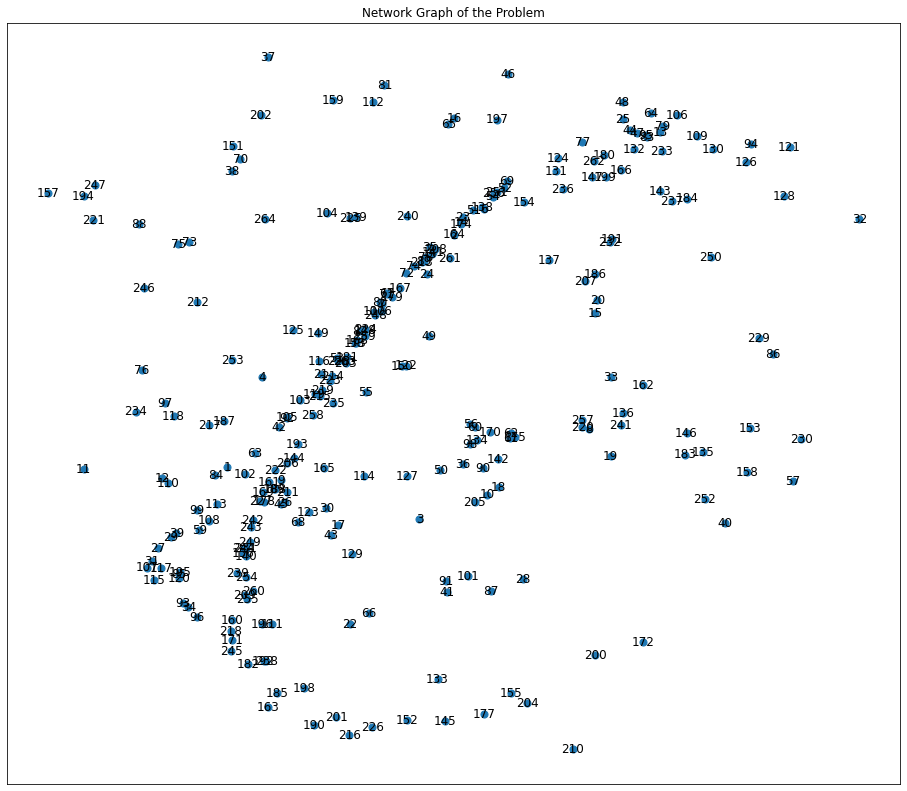

Name: pr264
Type: TSP
Dimension: 264
Comment: 264-city problem (Padberg/Rinaldi)
Distance: EUC_2D
Weight Matrix:
[[0 3256 3252 ... 8111 8065 7608]
 [3256 0 100 ... 7533 7548 7948]
 [3252 100 0 ... 7632 7647 8041]
 ...
 [8111 7533 7632 ... 0 150 2202]
 [8065 7548 7647 ... 150 0 2052]
 [7608 7948 8041 ... 2202 2052 0]]
Node Coordinates:
{1: [3425, 6450], 2: [3625, 3200], 3: [3525, 3200], 4: [3525, 3350], 5: [3625, 3350], 6: [3725, 3350], 7: [3725, 3650], 8: [3625, 3650], 9: [3525, 3650], 10: [3525, 3850], 11: [3625, 3850], 12: [3725, 3850], 13: [3725, 4150], 14: [3625, 4150], 15: [3525, 4150], 16: [3525, 4350], 17: [3625, 4350], 18: [3725, 4350], 19: [3725, 4650], 20: [3625, 4650], 21: [3525, 4650], 22: [3525, 4850], 23: [3625, 4850], 24: [3725, 4850], 25: [3725, 5150], 26: [3625, 5150], 27: [3525, 5150], 28: [3525, 5350], 29: [3625, 5350], 30: [3725, 5350], 31: [3725, 5650], 32: [3625, 5650], 33: [3525, 5650], 34: [3525, 5850], 35: [3625, 5850], 36: [3725, 5850], 37: [3725, 6150], 38: [

In [90]:
problem_dict = tsp('pr264.tsp')

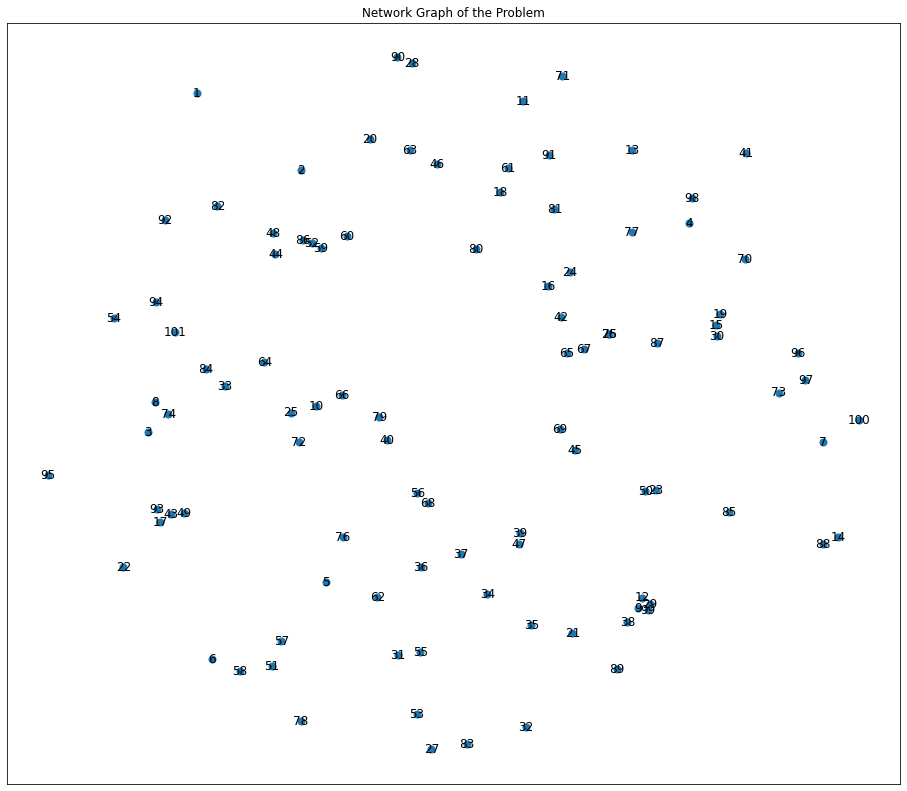

Name: eilB101
Type: CVRP
Dimension: 101
Comment: (Eilon et al.)
Distance: EUC_2D
Capacity: 112
Depots: [1]
Weight Matrix:
[[0 15 18 ... 21 17 24]
 [15 0 33 ... 36 31 39]
 [18 33 0 ... 16 17 17]
 ...
 [21 36 16 ... 0 5 3]
 [17 31 17 ... 5 0 8]
 [24 39 17 ... 3 8 0]]
Node Coordinates:
{1: [35, 35], 2: [41, 49], 3: [35, 17], 4: [55, 45], 5: [55, 20], 6: [15, 30], 7: [25, 30], 8: [20, 50], 9: [10, 43], 10: [55, 60], 11: [30, 60], 12: [20, 65], 13: [50, 35], 14: [30, 25], 15: [15, 10], 16: [30, 5], 17: [10, 20], 18: [5, 30], 19: [20, 40], 20: [15, 60], 21: [45, 65], 22: [45, 20], 23: [45, 10], 24: [55, 5], 25: [65, 35], 26: [65, 20], 27: [45, 30], 28: [35, 40], 29: [41, 37], 30: [64, 42], 31: [40, 60], 32: [31, 52], 33: [35, 69], 34: [53, 52], 35: [65, 55], 36: [63, 65], 37: [2, 60], 38: [20, 20], 39: [5, 5], 40: [60, 12], 41: [40, 25], 42: [42, 7], 43: [24, 12], 44: [23, 3], 45: [11, 14], 46: [6, 38], 47: [2, 48], 48: [8, 56], 49: [13, 52], 50: [6, 68], 51: [47, 47], 52: [49, 58], 53: [27,

In [91]:
problem_dict = tsp('eilB101.vrp')

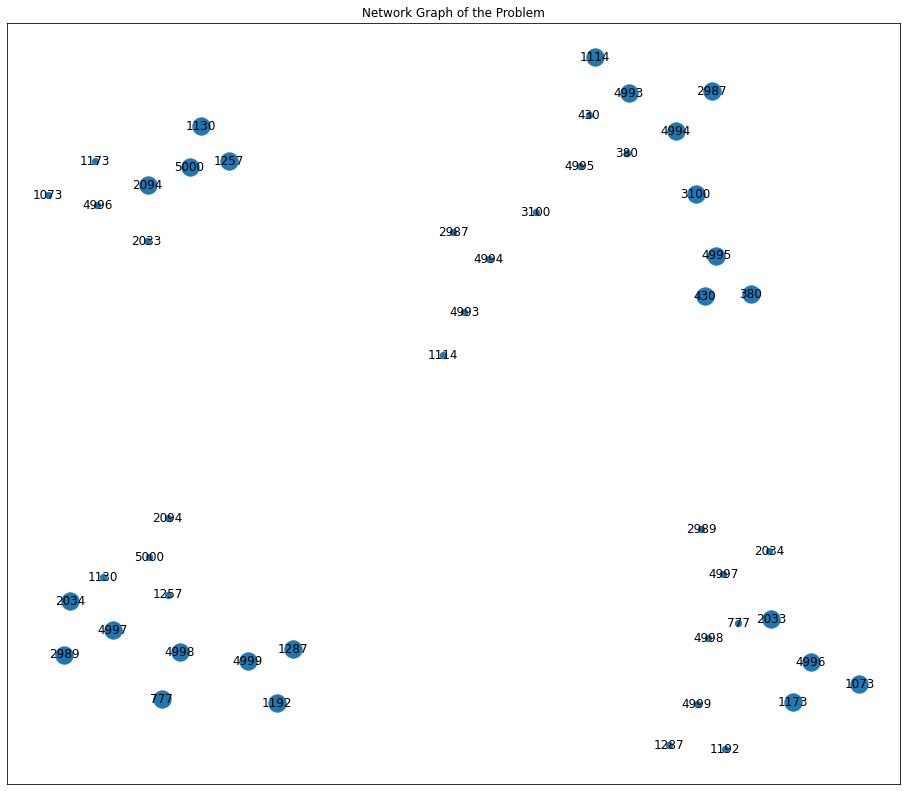

Name: alb5000
Type: HCP
Dimension: 5000
Comment: Hamiltonian cycle problem (Erbacci)
Distance: 
Weight Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
Node Coordinates:
{}


In [92]:
problem_dict = tsp('alb5000.hcp')

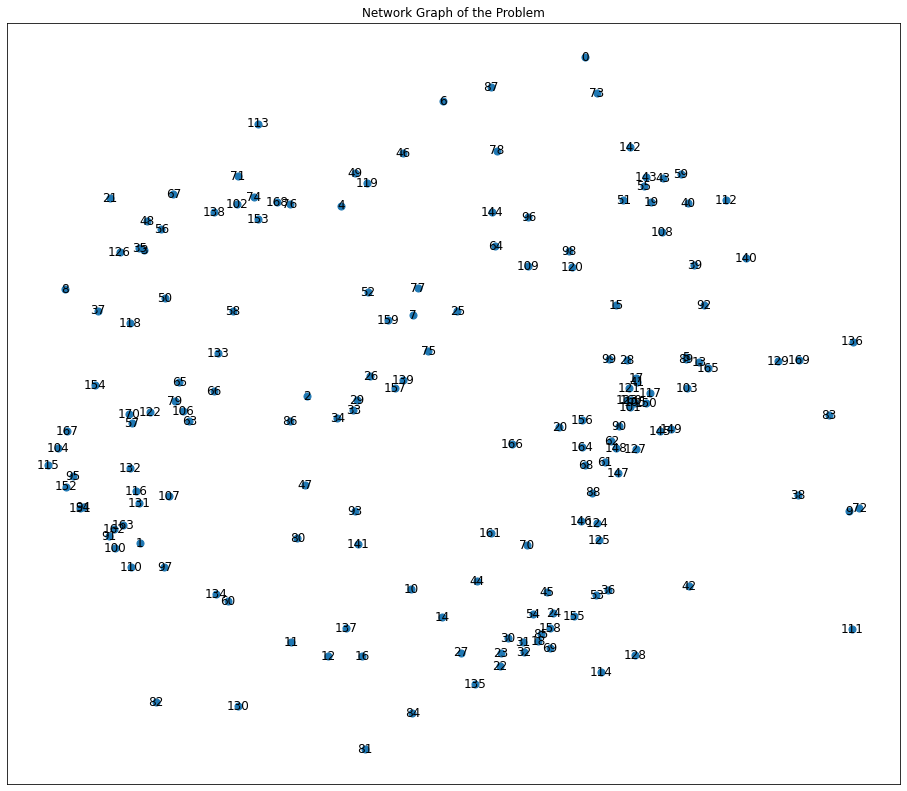

Name: ftv170
Type: ATSP
Dimension: 171
Comment: Asymmetric TSP (Fischetti)
Distance: EXPLICIT
Weight Matrix:
[[100000000 9 15 ... 60 68 45]
 [9 100000000 6 ... 51 75 36]
 [15 6 100000000 ... 57 69 42]
 ...
 [56 47 53 ... 100000000 122 33]
 [29 38 44 ... 89 100000000 74]
 [45 36 42 ... 15 111 100000000]]


In [93]:
problem_dict = tsp('ftv170.atsp')

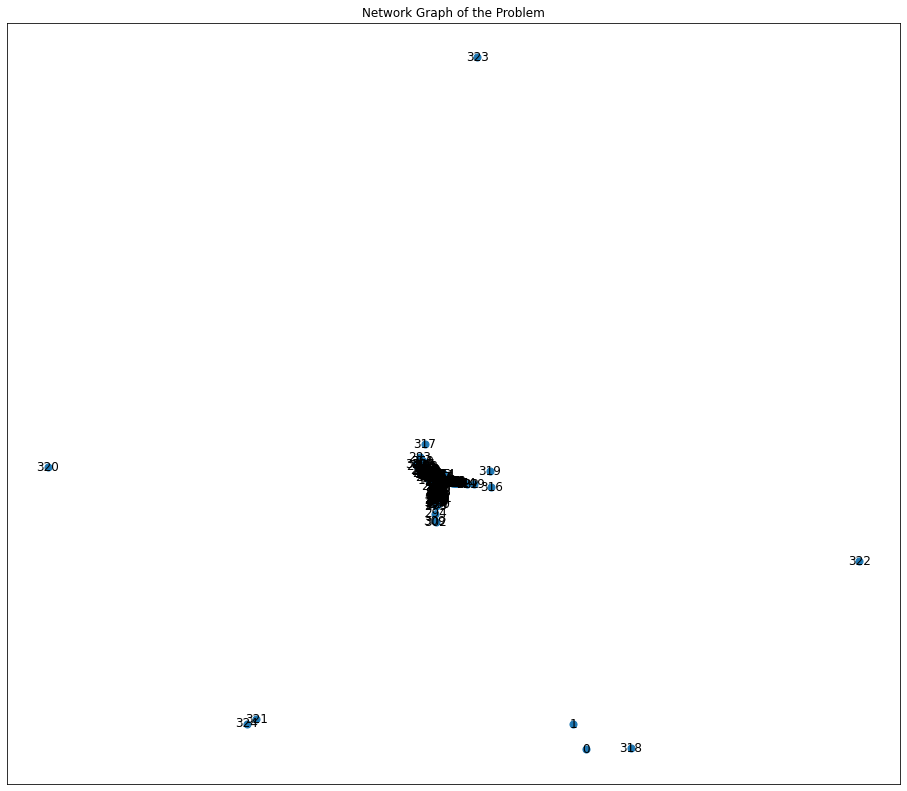

Name: rbg323a.sop
Type: SOP
Dimension: 325
Comment: Stacker crane application (Norbert Ascheuer)
Distance: EXPLICIT
Weight Matrix:
[[0 0 0 ... 0 0 1000000]
 [-1 0 18 ... 27 24 0]
 [-1 18 0 ... 27 24 0]
 ...
 [-1 -1 -1 ... 0 23 0]
 [-1 -1 -1 ... 27 0 0]
 [-1 -1 -1 ... -1 -1 0]]


In [94]:
problem_dict = tsp('rbg323a.sop')

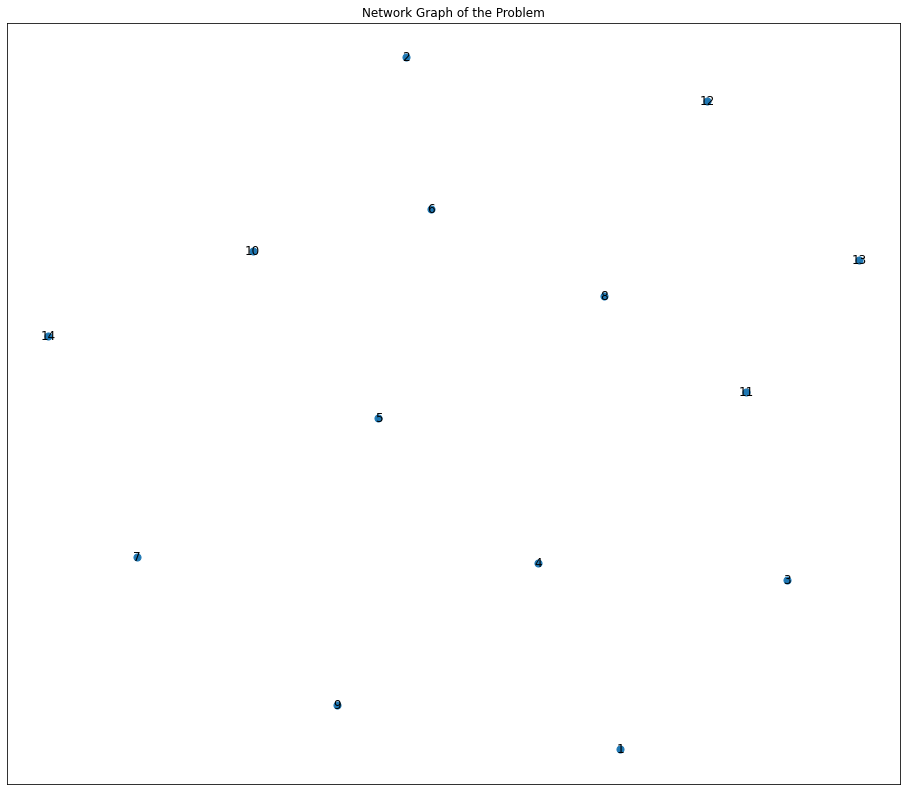

Name: burma14
Type: TSP
Dimension: 14
Comment: 14-Staedte in Burma (Zaw Win)
Distance: GEO
Weight Matrix:
[[0 153 510 706 966 581 455 70 160 372 157 567 342 398]
 [153 0 422 664 997 598 507 197 311 479 310 581 417 376]
 [510 422 0 289 744 390 437 491 645 880 618 374 455 211]
 [706 664 289 0 491 265 410 664 804 1070 768 259 499 310]
 [966 997 744 491 0 400 514 902 990 1261 947 418 635 636]
 [581 598 390 265 400 0 168 522 634 910 593 19 284 239]
 [455 507 437 410 514 168 0 389 482 757 439 163 124 232]
 [70 197 491 664 902 522 389 0 154 406 133 508 273 355]
 [160 311 645 804 990 634 482 154 0 276 43 623 358 498]
 [372 479 880 1070 1261 910 757 406 276 0 318 898 633 761]
 [157 310 618 768 947 593 439 133 43 318 0 582 315 464]
 [567 581 374 259 418 19 163 508 623 898 582 0 275 221]
 [342 417 455 499 635 284 124 273 358 633 315 275 0 247]
 [398 376 211 310 636 239 232 355 498 761 464 221 247 0]]
Node Coordinates:
{1: [16.47, 96.1], 2: [16.47, 94.44], 3: [20.09, 92.54], 4: [22.39, 93.37], 5: 

In [97]:
problem_dict = tsp('burma14.tsp')

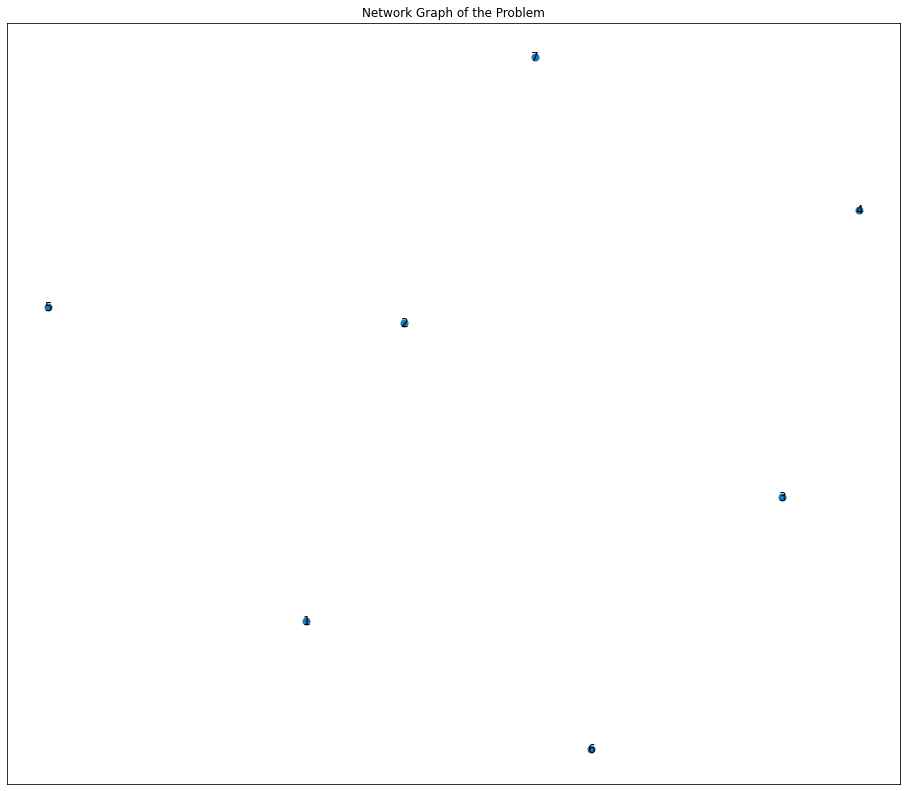

Name: eil7
Type: CVRP
Dimension: 7
Comment: (Eilon et al.)
Distance: EXPLICIT
Weight Matrix:
[[0 10 20 25 25 20 10]
 [10 0 12 20 25 30 20]
 [20 12 0 10 11 22 30]
 [25 20 10 0 2 11 25]
 [25 25 11 2 0 10 20]
 [20 30 22 11 10 0 12]
 [10 20 30 25 20 12 0]]


In [98]:
problem_dict = tsp('eil7.vrp')

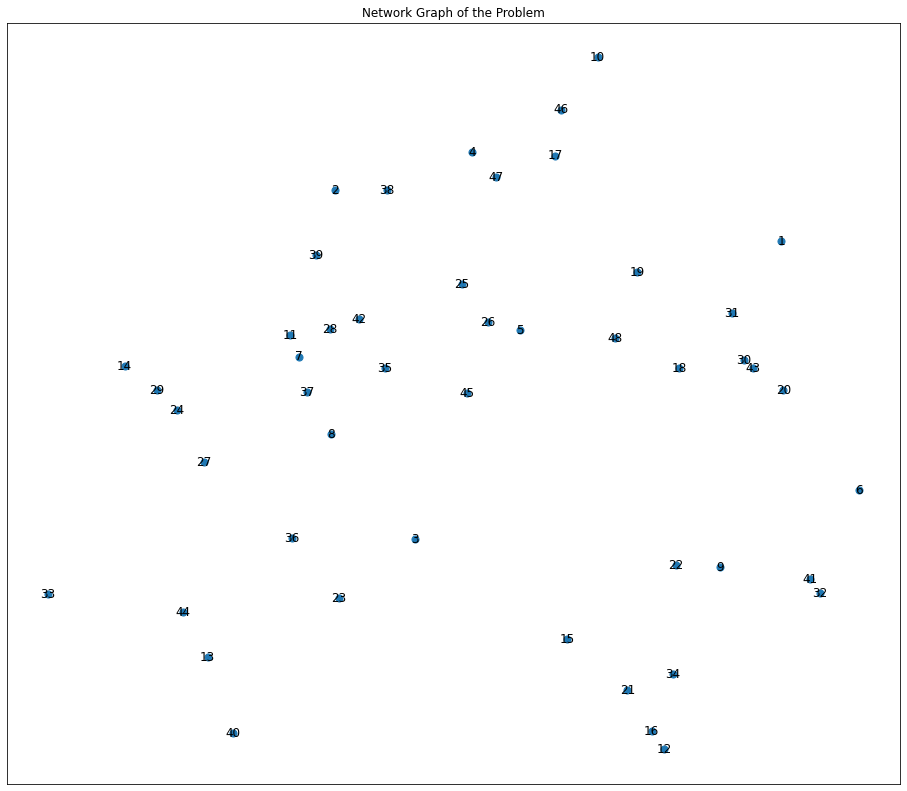

Name: att48
Type: CVRP
Dimension: 48
Comment: (Rinaldi,Yarrow/Araque)
Distance: ATT
Capacity: 15
Depots: [1]
Weight Matrix:
[[0 816 983 ... 819 406 424]
 [816 0 1495 ... 488 753 1184]
 [983 1495 0 ... 1727 1388 661]
 ...
 [819 488 1727 ... 0 520 1242]
 [406 753 1388 ... 520 0 801]
 [424 1184 661 ... 1242 801 0]]
Node Coordinates:
{1: [6823, 4674], 2: [7692, 2247], 3: [9135, 6748], 4: [7721, 3451], 5: [8304, 8580], 6: [7501, 5899], 7: [4687, 1373], 8: [5429, 1408], 9: [7877, 1716], 10: [7260, 2083], 11: [7096, 7869], 12: [6539, 3513], 13: [6272, 2992], 14: [6471, 4275], 15: [7110, 4369], 16: [6462, 2634], 17: [8476, 2874], 18: [3961, 1370], 19: [5555, 1519], 20: [4422, 1249], 21: [5584, 3081], 22: [5776, 4498], 23: [8035, 2880], 24: [6963, 3782], 25: [6336, 7348], 26: [8139, 8306], 27: [4326, 1426], 28: [5164, 1440], 29: [8389, 5804], 30: [4639, 1629], 31: [6344, 1436], 32: [5840, 5736], 33: [5972, 2555], 34: [7947, 4373], 35: [6929, 8958], 36: [5366, 1733], 37: [4550, 1219], 38: [6901,

In [99]:
problem_dict = tsp('att48.vrp')